<a href="https://colab.research.google.com/github/Jasmitha53/retro-vintage-app/blob/main/salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Step 1: Loading and preparing data 
Data split: 800 training samples and 200 testing samples.

 Step 2: Training the Random Forest model 
Model training complete.

 Step 3: Evaluating model performance 

 TABULAR COMPARISON:
     Actual Salary  Predicted Salary  Prediction Error
521         116537         113147.69           3389.31
737         100063         103593.16          -3530.16
740         154198         155461.20          -1263.20
660          96124         101065.94          -4941.94
411          98569          94556.94           4012.06
678         102257         106882.75          -4625.75
626          96951          93115.02           3835.98
513          83227          89001.50          -5774.50
859         129277         127897.43           1379.57
136          91880          88070.63           3809.37

 PERFORMANCE METRICS :
  - Mean Absolute Error (MAE): $3,227.49
    (This means our model's predictions are, on average, off by this amount)
  - R-squared (R²): 0.97
  

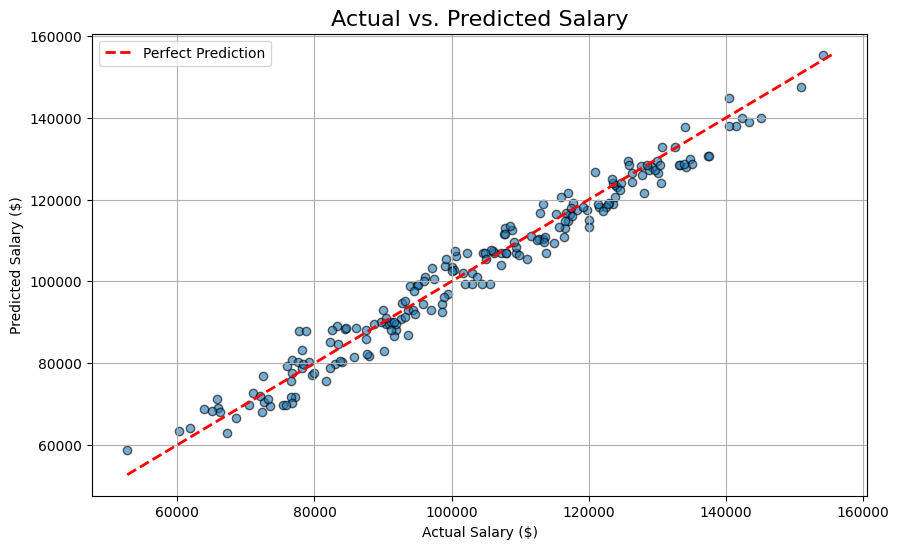

   - A plot window showing 'Actual vs. Predicted Salary' has been generated.

 Step 4: Making a prediction on a new employee 

Predicted salary for the new employee: $99,374.01


In [7]:

# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

# Generate a Synthetic Dataset
def create_dataset(num_samples=1000):
    """Creates a synthetic dataset of employee information."""
    np.random.seed(42)
    job_titles = ['Software Engineer', 'Data Scientist', 'Project Manager', 'HR Specialist', 'Marketing Manager']
    education_levels = ["Bachelor's", "Master's", "PhD"]
    data = {
        'JobTitle': np.random.choice(job_titles, num_samples),
        'EducationLevel': np.random.choice(education_levels, num_samples),
        'YearsExperience': np.random.randint(1, 25, size=num_samples)
    }
    df = pd.DataFrame(data)
    base_salary = 50000
    job_title_bonus = df['JobTitle'].map({'Software Engineer': 20000, 'Data Scientist': 30000, 'Project Manager': 15000, 'HR Specialist': 5000, 'Marketing Manager': 10000})
    education_bonus = df['EducationLevel'].map({"Bachelor's": 0, "Master's": 10000, "PhD": 25000})
    experience_bonus = df['YearsExperience'] * 2000
    random_noise = np.random.randint(-5000, 5000, size=num_samples)
    df['Salary'] = base_salary + job_title_bonus + education_bonus + experience_bonus + random_noise
    return df

# Define Features (X) and Target (y)
print(" Step 1: Loading and preparing data ")
employee_df = create_dataset()
X = employee_df[['JobTitle', 'EducationLevel', 'YearsExperience']]
y = employee_df['Salary']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split: {len(X_train)} training samples and {len(X_test)} testing samples.")

# Create a Preprocessing and Modeling Pipeline
categorical_features = ['JobTitle', 'EducationLevel']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the Model
print("\n Step 2: Training the Random Forest model ")
model_pipeline.fit(X_train, y_train)
print("Model training complete.")

# Evaluate the Model
print("\n Step 3: Evaluating model performance ")
y_pred = model_pipeline.predict(X_test)

# TABULAR RESULTS
print("\n TABULAR COMPARISON:")
results_df = pd.DataFrame({'Actual Salary': y_test, 'Predicted Salary': y_pred})
results_df['Prediction Error'] = results_df['Actual Salary'] - results_df['Predicted Salary']
results_df = results_df.round(2)
print(results_df.head(10).to_string())

# POINT-BASED SUMMARY
print("\n PERFORMANCE METRICS :")
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"  - Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"    (This means our model's predictions are, on average, off by this amount)")
print(f"  - R-squared (R²): {r2:.2f}")
print(f"    (This means our model explains {r2:.0%} of the variance in salary)")

# GRAPHICAL RESULTS
print("\n GRAPHICAL VISULIZATION :")
def plot_results(y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolors='k')


    perfect_line = np.linspace(min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max()), 100)
    plt.plot(perfect_line, perfect_line, 'r--', lw=2, label='Perfect Prediction')

    plt.xlabel("Actual Salary ($)")
    plt.ylabel("Predicted Salary ($)")
    plt.title("Actual vs. Predicted Salary", fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_results(y_test, y_pred)
print("   - A plot window showing 'Actual vs. Predicted Salary' has been generated.")


# Make a Prediction on New Data
print("\n Step 4: Making a prediction on a new employee ")
new_employee_data = pd.DataFrame({
    'JobTitle': ['Data Scientist'],
    'EducationLevel': ["Master's"],
    'YearsExperience': [5]
})
predicted_salary = model_pipeline.predict(new_employee_data)
print(f"\nPredicted salary for the new employee: ${predicted_salary[0]:,.2f}")